In [ ]:
from google.colab import files

# This will open a file chooser dialog
uploaded = files.upload()

# To access the uploaded file(s)
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")


Saving final.csv to final (1).csv
Uploaded file: final (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Load the CSV you cleaned earlier
import pandas as pd

df = pd.read_csv("final.csv")

print("Dataset loaded successfully.")
print("Shape:", df.shape)


Dataset loaded successfully.
Shape: (137, 12)


In [ ]:
# X = all input features
# y = final score (numeric target to predict)

X = df.drop(columns=["Estimated_Final_Score"])  # Make sure column name is correct
y = df["Estimated_Final_Score"]

In [ ]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["number"]).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Split data 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# MLP (Multilayer Perceptron) with dropout to avoid overfitting

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,561 (72.50 KB)

 Trainable params: 18,561 (72.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Trains on 72% of total data, validates on 8% (from training set)
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.1,  # 10% of training for validation
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 4944.1172 - mae: 69.2331 - val_loss: 4149.5630 - val_mae: 62.0488
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4998.7207 - mae: 69.5911 - val_loss: 4105.6777 - val_mae: 61.6813
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4881.4409 - mae: 68.9589 - val_loss: 4051.5796 - val_mae: 61.2182
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4678.1089 - mae: 67.3012 - val_loss: 3981.1367 - val_mae: 60.5986
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4698.9595 - mae: 67.4507 - val_loss: 3891.8914 - val_mae: 59.8036
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4575.3574 - mae: 66.3582 - val_loss: 3781.5461 - val_mae: 58.8026
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4489.8521 - mae: 65.8603 - val_loss: 3644.5789 - val_mae: 57.5396
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 4236.0938 - mae: 63.7488 - val_loss: 3477.8494 - val_mae: 55.9678
Epoch 9

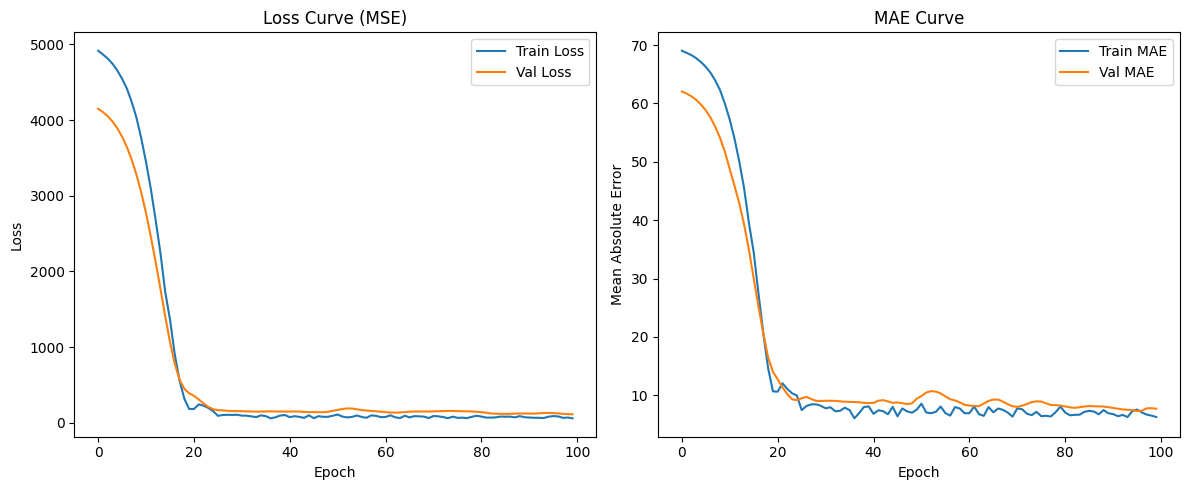

In [ ]:
# Visualize how the model learned over time
plt.figure(figsize=(12, 5))

# Plot MSE loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss Curve (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Val MAE")
plt.title("MAE Curve")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Predict continuous scores
y_pred = model.predict(X_test_processed)

# Regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # Added MAE
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")  # Display MAE
print(f"Test R² Score: {r2:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Test MSE: 149.98
Test MAE: 9.84
Test R² Score: 0.39


In [ ]:
# Define pass as score >= 50
y_test_binary = (y_test >= 50).astype(int)
y_pred_binary = (y_pred.flatten() >= 50).astype(int)

# Classification metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("\n Classification Metrics (Pass/Fail):")
print(f" Accuracy: {accuracy:.2f}")
print(f" Precision: {precision:.2f}")
print(f" Recall: {recall:.2f}")
print(f" F1 Score: {f1:.2f}")



 Classification Metrics (Pass/Fail):
 Accuracy: 0.89
 Precision: 1.00
 Recall: 0.88
 F1 Score: 0.94


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(neurons=[128,64,32], dropout=[0.3,0.2], lr=0.001):
    model = Sequential()
    model.add(Dense(neurons[0], activation='relu', input_shape=(X_train_processed.shape[1],)))
    model.add(Dropout(dropout[0]))
    model.add(Dense(neurons[1], activation='relu'))
    model.add(Dropout(dropout[1]))
    model.add(Dense(neurons[2], activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])
    return model

model = build_model(neurons=[256,128,64], dropout=[0.2,0.1], lr=0.0005)

history = model.fit(X_train_processed, y_train, validation_split=0.1, epochs=150, batch_size=32, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - loss: 4847.8818 - mae: 68.4566 - val_loss: 4159.9199 - val_mae: 62.1673
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 4918.4502 - mae: 68.9387 - val_loss: 4116.5312 - val_mae: 61.8134
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 4970.5210 - mae: 69.5624 - val_loss: 4068.4255 - val_mae: 61.4156
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 4721.7163 - mae: 67.5862 - val_loss: 4012.2595 - val_mae: 60.9485
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 4685.8550 - mae: 67.3264 - val_loss: 3944.2085 - val_mae: 60.3822
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 4696.3823 - mae: 67.4363 - val_loss: 3861.1526 - val_mae: 59.6816
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - loss: 4510.3613 - mae: 65.9315 - val_loss: 3759.2017 - val_mae: 58.8061
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - loss: 4407.8184 - mae: 65.3490 - val_loss: 3635.7563 - val_mae: 57.7303


In [ ]:
# ---------------- Regression Metrics ----------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred = model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² Score: {r2:.2f}")

# ---------------- Pass/Fail Classification Metrics ----------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define pass as score >= 50
y_test_binary = (y_test >= 50).astype(int)
y_pred_binary = (y_pred.flatten() >= 50).astype(int)  # flatten for Keras output

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("\nClassification Metrics (Pass/Fail):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Regression Metrics:
Test MSE: 108.19
Test MAE: 8.25
Test R² Score: 0.56

Classification Metrics (Pass/Fail):
Accuracy: 0.96
Precision: 1.00
Recall: 0.96
F1 Score: 0.98


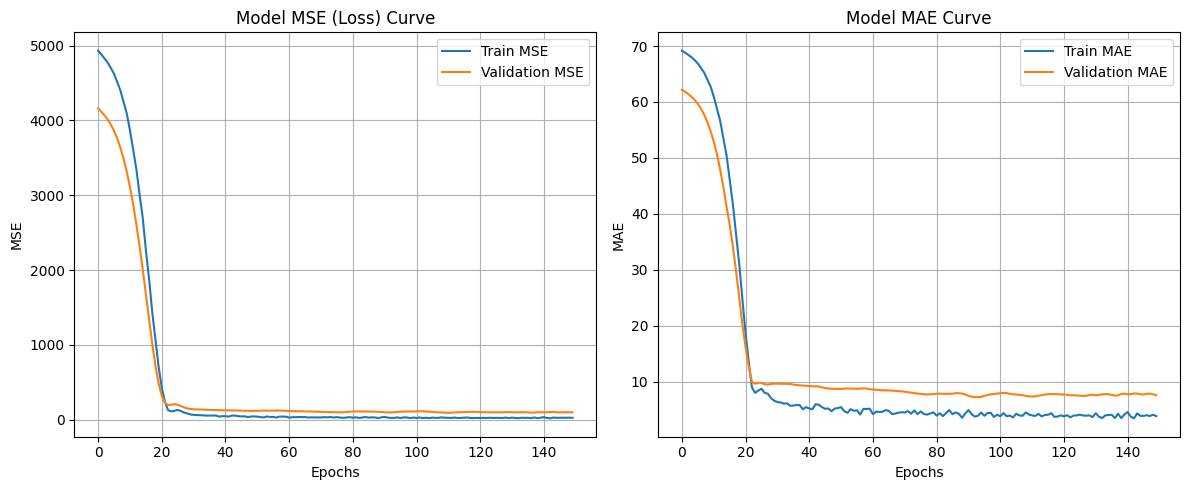

In [ ]:
import matplotlib.pyplot as plt

# Plot MSE (loss)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model MSE (Loss) Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Plot MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')  # Fixed line
plt.title('Model MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_processed, y_train,
    validation_split=0.1,
    epochs=300,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - loss: 24.6261 - mae: 3.8060 - val_loss: 92.4185 - val_mae: 7.3560
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 18.0750 - mae: 3.4317 - val_loss: 89.4664 - val_mae: 7.2604
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 20.0968 - mae: 3.5496 - val_loss: 88.3350 - val_mae: 7.2365
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 25.6497 - mae: 3.9576 - val_loss: 87.8731 - val_mae: 7.2280
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 19.6067 - mae: 3.5841 - val_loss: 88.5294 - val_mae: 7.2571
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 25.7454 - mae: 4.0332 - val_loss: 91.1548 - val_mae: 7.3492
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 22.4509 - mae: 3.7736 - val_loss: 92.9178 - val_mae: 7.4029
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 34.3360 - mae: 4.8309 - val_loss: 93.8778 - val_mae: 7.4182
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - los

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_pred = model.predict(X_test_processed)

# ---------------- Regression Metrics ----------------
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² Score: {r2:.2f}")

# ---------------- Classification Metrics (Pass/Fail) ----------------
# Convert to pass/fail
y_test_binary = (y_test >= 50).astype(int)
y_pred_binary = (y_pred.flatten() >= 50).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("\nClassification Metrics (Pass/Fail):")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Regression Metrics:
Test MSE: 99.01
Test MAE: 7.74
Test R² Score: 0.60

Classification Metrics (Pass/Fail):
Accuracy: 0.96
Precision: 1.00
Recall: 0.96
F1 Score: 0.98


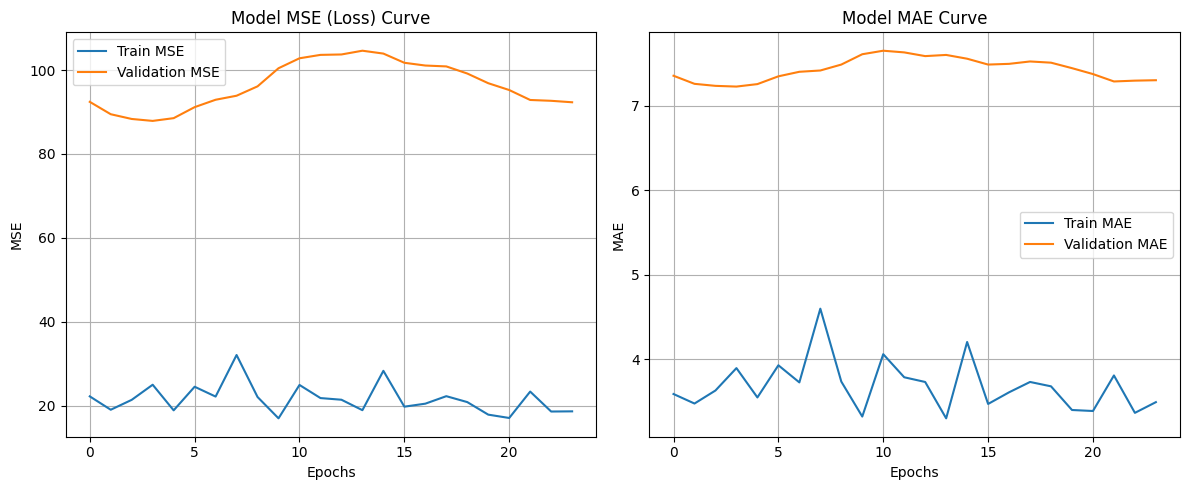

In [ ]:
import matplotlib.pyplot as plt

# ---------------- Plot Learning Curves ----------------
plt.figure(figsize=(12,5))

# MSE (loss) curve
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model MSE (Loss) Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# MAE curve
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


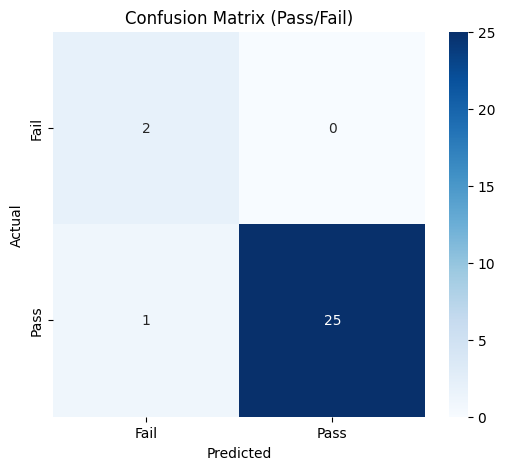

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail','Pass'], yticklabels=['Fail','Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Pass/Fail)')
plt.show()
